In [31]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os

## Question 1

In [43]:
c_m = 10 # nF/mm^2
g_L = 1.0 # microS/mm^2
E_L = -70 # mV
E_ex = 0
V_th = -54 # mV
V_reset = -80 # mV
tau_ex = 10 # ms

delta_g_ex = 0.5 # microS / mm^2
dt = 0.01 # ms

presynaptic_action_potential_times = [100, 200, 230, 300, 320, 400, 410] # ms
presynaptic_action_potentials_timesteps = [int(time / dt) for time in presynaptic_action_potential_times]

In [44]:
total_time = 500 # ms
time_steps = np.linspace(0, total_time, int(total_time / dt + 1)) # creating timespace with dt=0.01 ms
voltages = np.zeros_like(time_steps)
synaptic_conductance = np.zeros_like(time_steps)

spike_times = np.zeros_like(time_steps)
voltages[0] = -70

for idx in tqdm(range(len(time_steps) - 1)):
    
    if idx in presynaptic_action_potentials_timesteps:
        synaptic_conductance[idx] += delta_g_ex
    
    if voltages[idx] >= V_th:
        voltages[idx] = V_reset
        spike_times[idx] = 1
    
    dg_ex = -synaptic_conductance[idx] * (dt / tau_ex)
    dV = (-g_L * (voltages[idx] - E_L) - synaptic_conductance[idx] * (voltages[idx] - E_ex)) * (dt / c_m)
    
    voltages[idx + 1] =  voltages[idx] + dV
    synaptic_conductance[idx + 1] = synaptic_conductance[idx] + dg_ex
voltages[spike_times == 1] = 40 # for spike visualization

  0%|          | 0/50000 [00:00<?, ?it/s]

In [45]:
synaptic_current = synaptic_conductance * (voltages - E_ex) # nA / mm^2

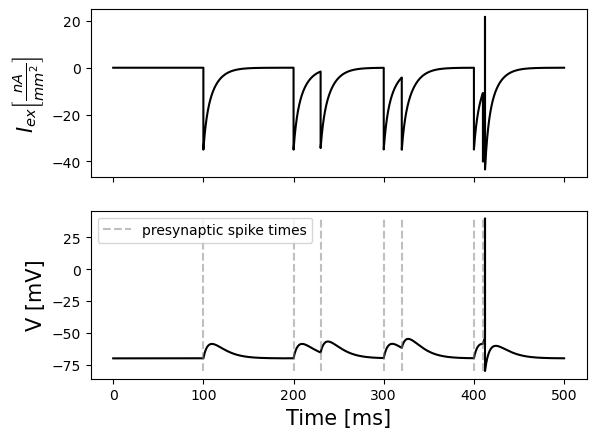

In [46]:
fig, axs = plt.subplots(2, 1,  sharex=True)
axs[0].plot(time_steps, synaptic_current, color='black')
axs[0].set_ylabel(r'$I_{ex}  \left[\frac{ nA}{mm^2}\right]$', fontsize=15)
axs[1].plot(time_steps, voltages, color='black')
axs[1].vlines(presynaptic_action_potential_times, -80, 40, linestyles='--', alpha=0.5, color='gray', label='presynaptic spike times')
axs[1].set_ylabel(r'V [mV]', fontsize=15)
axs[1].set_xlabel('Time [ms]', fontsize=15)
axs[1].legend()
output_dir = './plots/'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'q1.png'))
plt.show()

In [52]:
print(f"Postsynaptic neuron emmited a spike at {round(time_steps[spike_times == 1].item(), 2)} ms.")

Postsynaptic neuron emmited a spike at 412.28 ms.


## Question 2

In [101]:
def simulate_LIF(
        total_time = 1000, # ms
        sigma_V = 1, # mV
        spiking_on = True,
):
    tau_m = 10 # ms
    V_th = -54
    V_reset = - 80 # mV
    dt = 0.01 # ms
    
    time_steps = np.linspace(0, total_time, int(total_time / dt + 1)) # creating timespace with dt=0.01 ms
    voltages = np.zeros_like(time_steps)

    voltages[0] = -70  # mV
    spike_times = np.zeros_like(time_steps)
    E_eff = -56 + sigma_V * np.sqrt(2 * tau_m / dt) * np.random.randn(len(time_steps))
    
    for idx in range(len(time_steps) - 1):
        if (voltages[idx] >= V_th) & (spiking_on):
            voltages[idx] = V_reset
            spike_times[idx] = 1
    
        dV = (-voltages[idx] + E_eff[idx]) * (dt / tau_m)
    
        voltages[idx + 1] = voltages[idx] + dV
    
    firing_rate = np.sum(spike_times) / (total_time / 1000) # converting firing rate to Hz
    voltages[spike_times == 1] = 40
    return time_steps, voltages, spike_times, firing_rate

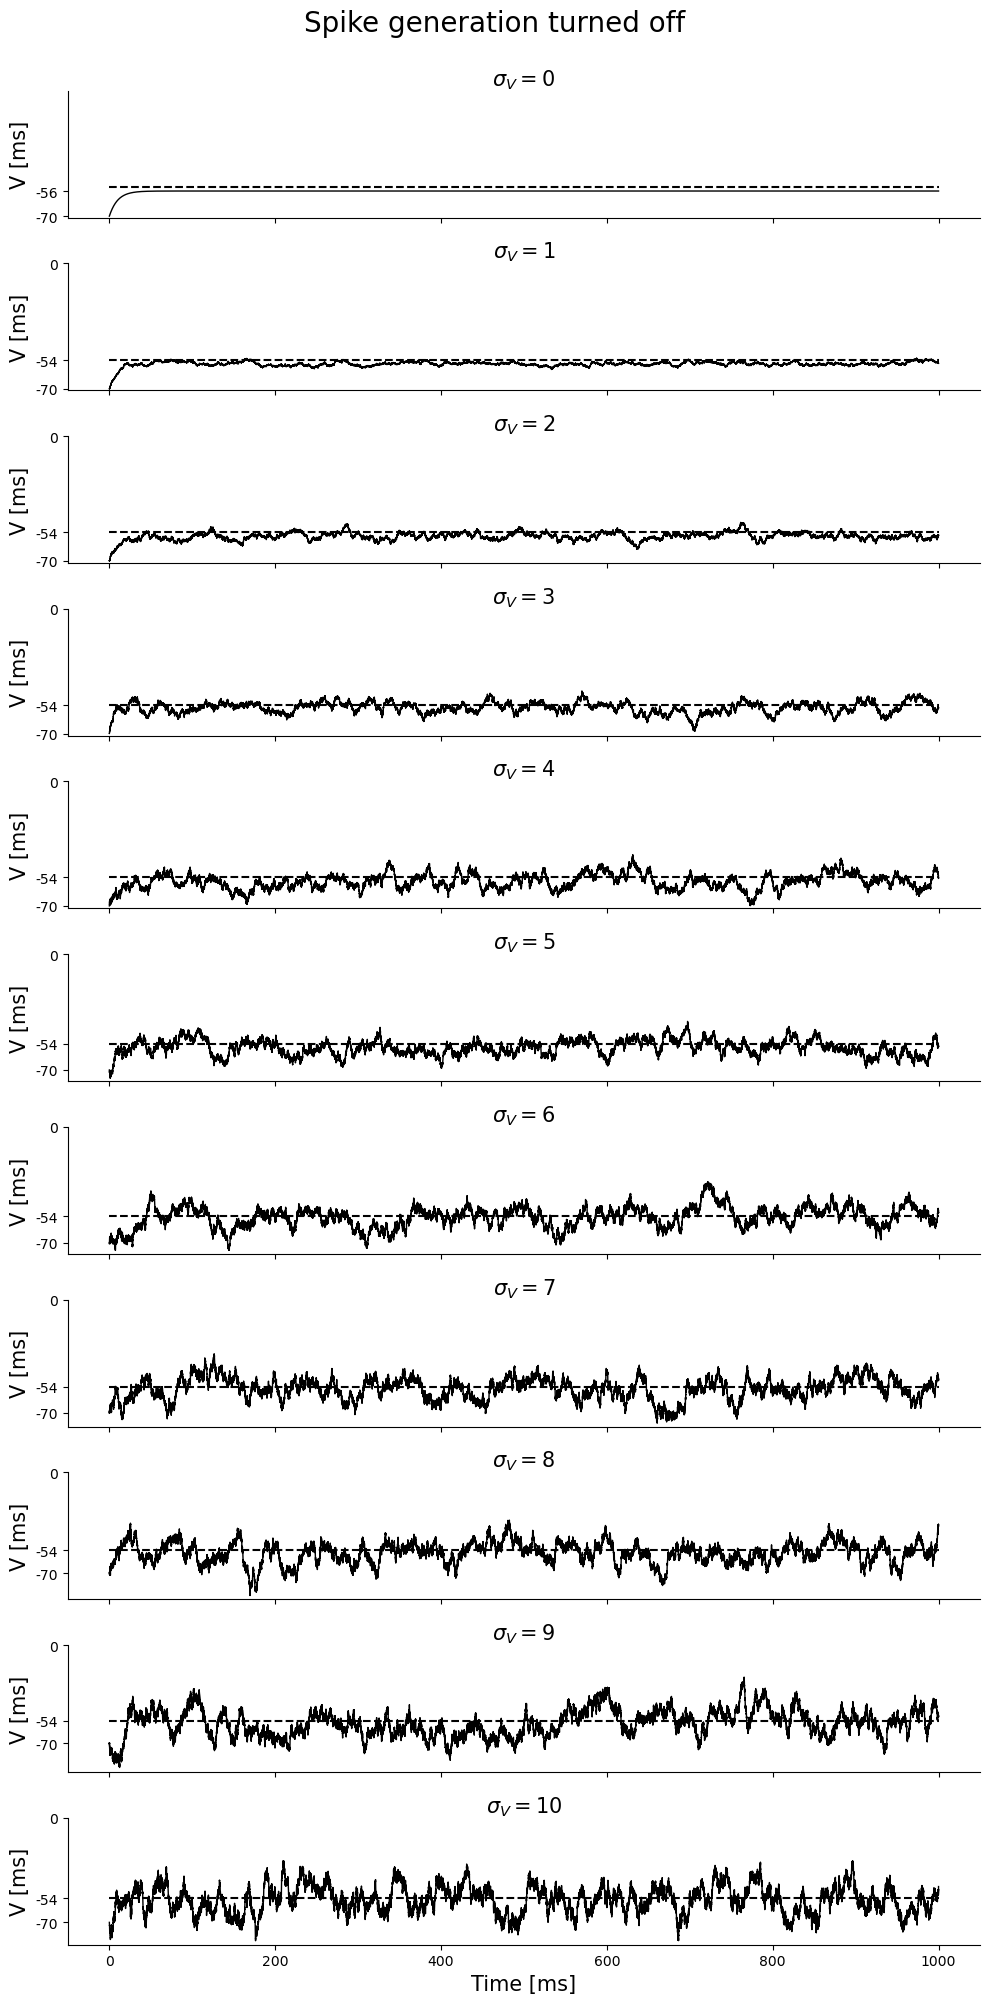

In [94]:
sigmas_range = np.arange(0, 11)
stds = np.zeros(len(sigmas_range))
total_time = 1000 # ms
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20), sharex=True)
for idx, sigma in enumerate(sigmas_range):
    time_steps, voltages, _, _ = simulate_LIF(total_time = total_time, sigma_V = sigma, spiking_on = False)
    stds[idx] = np.std(voltages)
    axs[idx].plot(time_steps, voltages, color='k', linewidth=1)
    axs[idx].set_title(r"$\sigma_{V}=$" + str(sigma), fontsize=15, pad=3)
    axs[idx].set_ylabel("V [ms]", fontsize=15)
    axs[idx].spines[['right', 'top']].set_visible(False)
    axs[idx].hlines(-54, 0, total_time, color='k', linestyles='--')
    axs[idx].set_yticks([-70, -54, 0], [-70, -54, 0])
    if idx == len(sigmas_range) - 1:
        axs[idx].set_xlabel('Time [ms]', fontsize=15)
axs[0].set_yticks([-70, -56], [-70, -56])
fig.suptitle('Spike generation turned off', fontsize=20, y=1)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'q2_traces_spiking_off.png'))
plt.show()

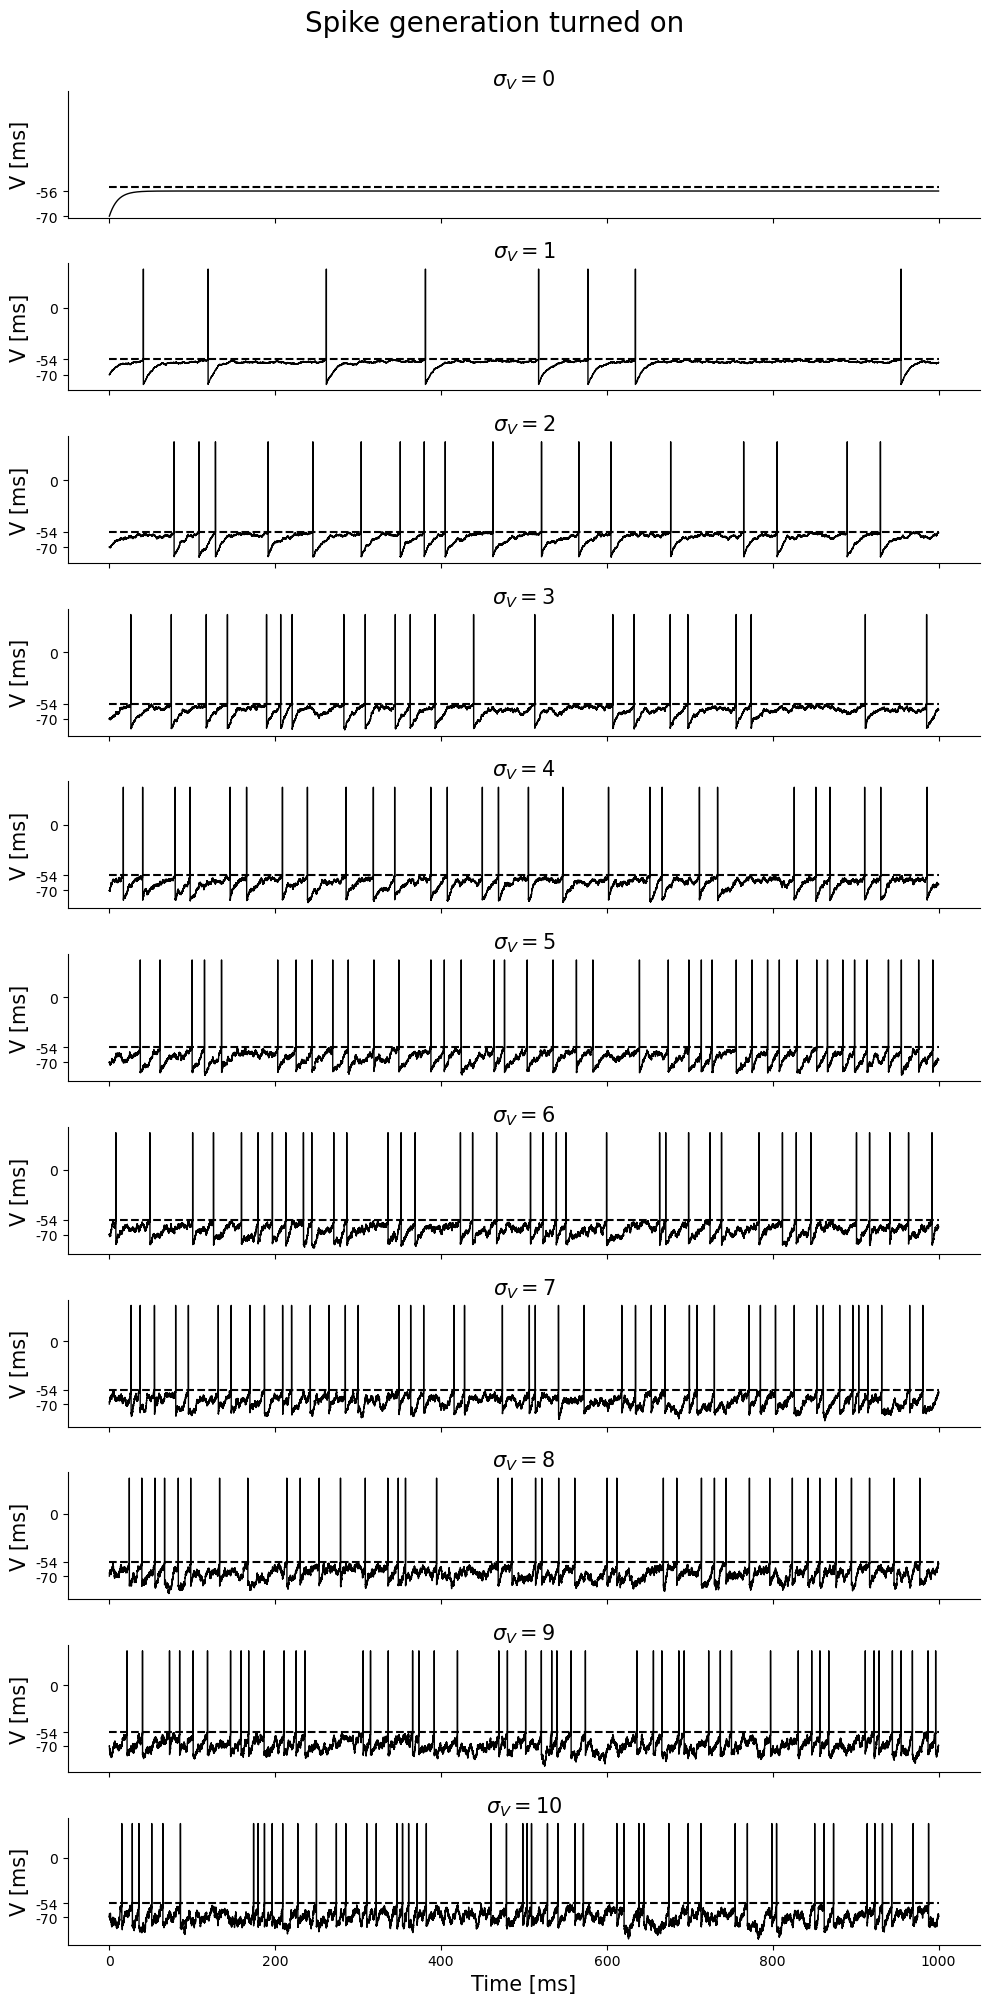

In [95]:
sigmas_range = np.arange(0, 11)
stds = np.zeros(len(sigmas_range))
total_time = 1000 # ms
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20), sharex=True)
for idx, sigma in enumerate(sigmas_range):
    time_steps, voltages, _, _ = simulate_LIF(total_time = total_time, sigma_V = sigma, spiking_on = True)
    stds[idx] = np.std(voltages)
    axs[idx].plot(time_steps, voltages, color='k', linewidth=1)
    axs[idx].set_title(r"$\sigma_{V}=$" + str(sigma), fontsize=15, pad=3)
    axs[idx].set_ylabel("V [ms]", fontsize=15)
    axs[idx].spines[['right', 'top']].set_visible(False)
    axs[idx].hlines(-54, 0, total_time, color='k', linestyles='--')
    axs[idx].set_yticks([-70, -54, 0], [-70, -54, 0])
    if idx == len(sigmas_range) - 1:
        axs[idx].set_xlabel('Time [ms]', fontsize=15)
axs[0].set_yticks([-70, -56], [-70, -56])
fig.suptitle('Spike generation turned on', fontsize=20, y=1)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'q2_traces_spiking_on.png'))
plt.show()

0it [00:00, ?it/s]

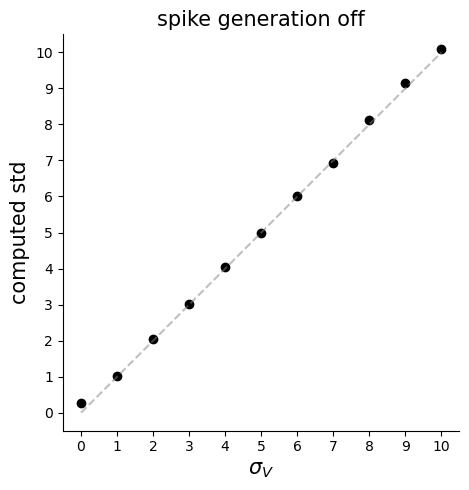

In [100]:
stds_off = np.zeros(len(sigmas_range))
total_time = 15000 # ms
for idx, sigma in tqdm(enumerate(sigmas_range)):
    time_steps, voltages, _, _ = simulate_LIF(total_time = total_time, sigma_V = sigma, spiking_on = False)
    stds_off[idx] = np.std(voltages)
    
fig, axs = plt.subplots(figsize=(5, 5))
axs.scatter(sigmas_range, stds_off, c='k')
axs.plot(sigmas_range, sigmas_range, linestyle='--', c='gray', alpha=0.5)
axs.set_ylim([-0.5, 10.5])
axs.set_xlim([-0.5, 10.5])
axs.set_aspect('equal')
axs.set_ylabel("computed std", fontsize=15)

axs.spines[['right', 'top']].set_visible(False)
axs.set_xlabel(r"$\sigma_{V}$", fontsize=15)
axs.set_xticks(sigmas_range, sigmas_range)
axs.set_yticks(sigmas_range, sigmas_range)
axs.set_title(f'spike generation off', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'q2_std_plot.png'))
plt.show()

0it [00:00, ?it/s]

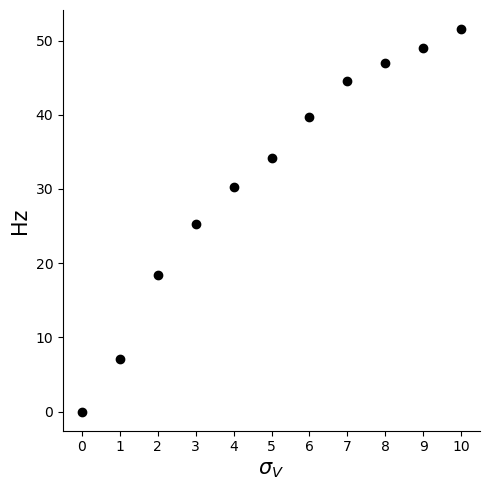

In [107]:
sigmas_range = np.arange(0, 11)
firing_rates = np.zeros(len(sigmas_range))
total_time = 15000 # ms
for idx, sigma in tqdm(enumerate(sigmas_range)):
    _, _, _, firing_rate = simulate_LIF(total_time = total_time, sigma_V = sigma, spiking_on = True)
    firing_rates[idx] = firing_rate
    
fig, axs = plt.subplots(figsize=(5, 5))
axs.scatter(sigmas_range, firing_rates, c='k')
axs.set_xlim([-0.5, 10.5])
axs.set_ylabel("Hz", fontsize=15)
axs.spines[['right', 'top']].set_visible(False)
axs.set_xlabel(r"$\sigma_{V}$", fontsize=15)
axs.set_xticks(sigmas_range, sigmas_range)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'q2_firing_rates_plot.png'))
plt.show()